<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,64.798454,-64.868724,9.929729,58.129290,-48.199561
1,0.0,1.0,28.823045,40.324740,79.147785,25.680684,53.467101
2,0.0,2.0,29.644204,-40.665608,-1.021404,26.421342,-27.442746
3,0.0,3.0,30.803105,-52.125476,-11.322371,27.466631,-38.789003
4,0.0,4.0,88.203000,-487.681315,-389.478315,79.239403,-468.717718
...,...,...,...,...,...,...,...
59995,999.0,55.0,98.939800,338.568220,447.508020,68.899430,378.608590
59996,999.0,56.0,98.676609,39.905129,148.581738,68.756002,79.825736
59997,999.0,57.0,91.148239,-90.727831,10.420408,64.653344,-54.232936
59998,999.0,58.0,82.360144,-57.629510,34.730633,59.864187,-25.133554


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,64.798454,-64.868724,9.929729,58.129290,-48.199561
1,0.0,1.0,28.823045,40.324740,79.147785,25.680684,53.467101
2,0.0,2.0,29.644204,-40.665608,-1.021404,26.421342,-27.442746
3,0.0,3.0,30.803105,-52.125476,-11.322371,27.466631,-38.789003
4,0.0,4.0,88.203000,-487.681315,-389.478315,79.239403,-468.717718
...,...,...,...,...,...,...,...
59995,999.0,55.0,98.939800,338.568220,447.508020,68.899430,378.608590
59996,999.0,56.0,98.676609,39.905129,148.581738,68.756002,79.825736
59997,999.0,57.0,91.148239,-90.727831,10.420408,64.653344,-54.232936
59998,999.0,58.0,82.360144,-57.629510,34.730633,59.864187,-25.133554


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y      y_hat       e_hat
rep   index                                                          
0.0   0.0    64.798454  -64.868724    9.929729  58.129290  -48.199561
      1.0    28.823045   40.324740   79.147785  25.680684   53.467101
      2.0    29.644204  -40.665608   -1.021404  26.421342  -27.442746
      3.0    30.803105  -52.125476  -11.322371  27.466631  -38.789003
      4.0    88.203000 -487.681315 -389.478315  79.239403 -468.717718
...                ...         ...         ...        ...         ...
999.0 55.0   98.939800  338.568220  447.508020  68.899430  378.608590
      56.0   98.676609   39.905129  148.581738  68.756002   79.825736
      57.0   91.148239  -90.727831   10.420408  64.653344  -54.232936
      58.0   82.360144  -57.629510   34.730633  59.864187  -25.133554
      59.0   23.745868   47.905652   81.651520  27.921775   53.729746

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y      y_hat       e_hat
rep   index                                                          
0.0   0.0    64.798454  -64.868724    9.929729  58.129290  -48.199561
      1.0    28.823045   40.324740   79.147785  25.680684   53.467101
      2.0    29.644204  -40.665608   -1.021404  26.421342  -27.442746
      3.0    30.803105  -52.125476  -11.322371  27.466631  -38.789003
      4.0    88.203000 -487.681315 -389.478315  79.239403 -468.717718
...                ...         ...         ...        ...         ...
999.0 55.0   98.939800  338.568220  447.508020  68.899430  378.608590
      56.0   98.676609   39.905129  148.581738  68.756002   79.825736
      57.0   91.148239  -90.727831   10.420408  64.653344  -54.232936
      58.0   82.360144  -57.629510   34.730633  59.864187  -25.133554
      59.0   23.745868   47.905652   81.651520  27.921775   53.729746

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,64.798454,-64.868724,9.929729,58.129290,-48.199561
1,0.0,1.0,28.823045,40.324740,79.147785,25.680684,53.467101
2,0.0,2.0,29.644204,-40.665608,-1.021404,26.421342,-27.442746
3,0.0,3.0,30.803105,-52.125476,-11.322371,27.466631,-38.789003
4,0.0,4.0,88.203000,-487.681315,-389.478315,79.239403,-468.717718
...,...,...,...,...,...,...,...
59995,999.0,55.0,98.939800,338.568220,447.508020,68.899430,378.608590
59996,999.0,56.0,98.676609,39.905129,148.581738,68.756002,79.825736
59997,999.0,57.0,91.148239,-90.727831,10.420408,64.653344,-54.232936
59998,999.0,58.0,82.360144,-57.629510,34.730633,59.864187,-25.133554


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1           e           Y      y_hat       e_hat
rep   index                                                          
0.0   0.0    64.798454  -64.868724    9.929729  58.129290  -48.199561
      1.0    28.823045   40.324740   79.147785  25.680684   53.467101
      2.0    29.644204  -40.665608   -1.021404  26.421342  -27.442746
      3.0    30.803105  -52.125476  -11.322371  27.466631  -38.789003
      4.0    88.203000 -487.681315 -389.478315  79.239403 -468.717718
...                ...         ...         ...        ...         ...
999.0 55.0   98.939800  338.568220  447.508020  68.899430  378.608590
      56.0   98.676609   39.905129  148.581738  68.756002   79.825736
      57.0   91.148239  -90.727831   10.420408  64.653344  -54.232936
      58.0   82.360144  -57.629510   34.730633  59.864187  -25.133554
      59.0   23.745868   47.905652   81.651520  27.921775   53.729746

[60000 rows x 5 columns]

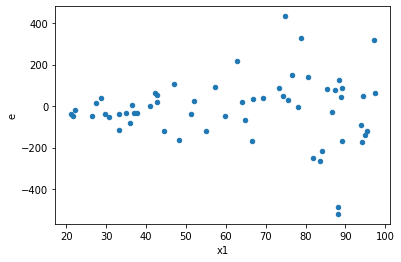

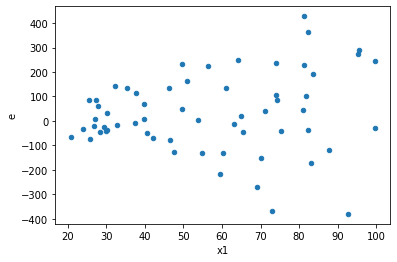

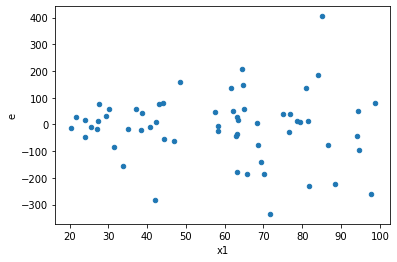

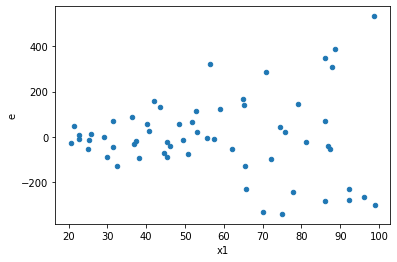

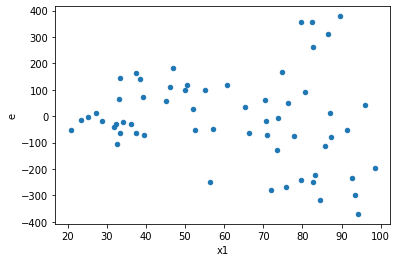

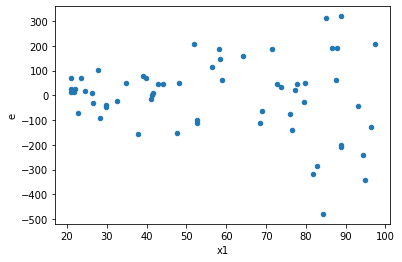

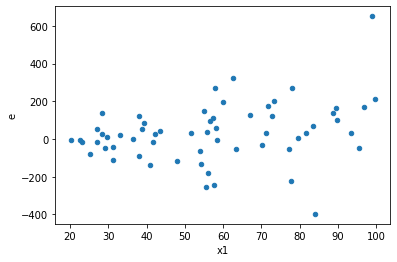

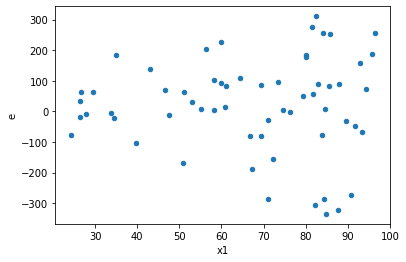

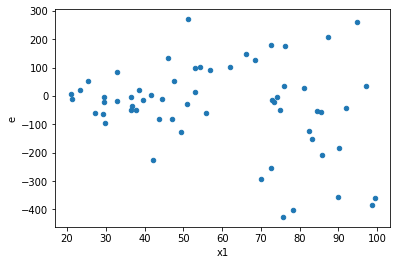

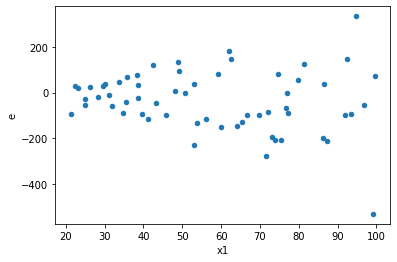

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,23.0,85408.14833354391,1037025.2414125325,3713.397753632344,45088.05397445794,12.141994196650234,8.816632068864294e-08,0.9999999559168397,4.408316034432147e-08,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,117785.64688327117,1021598.9118818399,5121.115081881355,44417.343994862604,8.67337352991976,2.247884210326845e-06,0.9999988760578948,1.1239421051634224e-06,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,175928.35042209027,590159.5096854795,7649.058714003925,25659.109116759977,3.3545446670167642,0.0052592726911695475,0.9973703636544152,0.0026296363455847738,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,115605.94792176217,1494842.2415224153,5026.345561815747,64993.14093575719,12.930495951073981,4.7161003768891874e-08,0.9999999764194981,2.3580501884445937e-08,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,83054.75263774392,1032235.0237435192,3611.07620164104,44879.78364102257,12.428367925502963,6.99708866402915e-08,0.9999999650145567,3.498544332014575e-08,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,114252.16197750649,876579.6370122009,4967.485303369847,38112.158130965254,7.672324285511362,6.952649246105835e-06,0.999996523675377,3.4763246230529177e-06,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,181102.09829057823,985928.4056008614,7874.004273503401,42866.45241742876,5.444047390433543,0.00013688686536461603,0.9999315565673177,6.844343268230801e-05,Reject001=0 : Heteroscedasticity
9.0,23.0,23.0,89855.24890826466,660275.4587052311,3906.7499525332464,28707.628639357874,7.348212449773767,1.0268606669638913e-05,0.9999948656966652,5.134303334819457e-06,Reject001=0 : Heteroscedasticity
10.0,23.0,23.0,155982.751554247,429471.29339709185,6781.85876322813,18672.664930308343,2.7533255383543627,0.018555259916796185,0.9907223700416019,0.009277629958398093,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,85408.14833354391,1037025.2414125325,3713.397753632344,45088.05397445794,12.141994196650234,8.816632068864294e-08,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,117785.64688327117,1021598.9118818399,5121.115081881355,44417.343994862604,8.67337352991976,2.247884210326845e-06,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,175928.35042209027,590159.5096854795,7649.058714003925,25659.109116759977,3.3545446670167642,0.0052592726911695475,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,115605.94792176217,1494842.2415224153,5026.345561815747,64993.14093575719,12.930495951073981,4.7161003768891874e-08,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,1210379.4936661434,118996.93830498037,52625.19537678884,5173.779926303495,0.09831374286137987,4.966091263494749e-07,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,83054.75263774392,1032235.0237435192,3611.07620164104,44879.78364102257,12.428367925502963,6.99708866402915e-08,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,114252.16197750649,876579.6370122009,4967.485303369847,38112.158130965254,7.672324285511362,6.952649246105835e-06,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,181102.09829057823,985928.4056008614,7874.004273503401,42866.45241742876,5.444047390433543,0.00013688686536461603,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,895084.9084004649,111481.29378271973,38916.7351478463,4847.012773161728,0.12454828892371685,4.591913087166309e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    942
Reject001=1 : Homoscedasticity       58
Name: Result_test, dtype: int64